In [15]:
# load basic packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format

# load visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

!pip install -U graphviz

In [16]:
# load data with outcome (F202) and shortlisted features
df = pd.read_csv('https://www.dropbox.com/s/9tb6a5vfyfny753/WVS_TimeSeries_1981_2020_stata_v2_0_shortlisted.csv?dl=1')

df['Religion_over_science'] = df['F202']

In [17]:
# Change invalid values (<=) to None, and remove columns with only invalid values.
cols_drop = []
for i in df.columns:
    if df[i].max()<0:
        cols_drop.append(str(i))
if 'Religion_over_science' in cols_drop:
  cols_drop.remove('Religion_over_science')
df = df.drop(cols_drop, axis=1)
df = df.mask(df < 0)

# Remove volumns with less than 100,000 rows
cols_drop = []
for i in df.columns:
    if df[i].count()<=100000:
        cols_drop.append(str(i))
if 'Religion_over_science' in cols_drop:
  cols_drop.remove('Religion_over_science')
df = df.drop(cols_drop, axis=1)

# Drop rows with NA
df = df.dropna()

# X002 (birth year) and X003 (age) duplicate
df = df.drop(['X002'], axis=1)

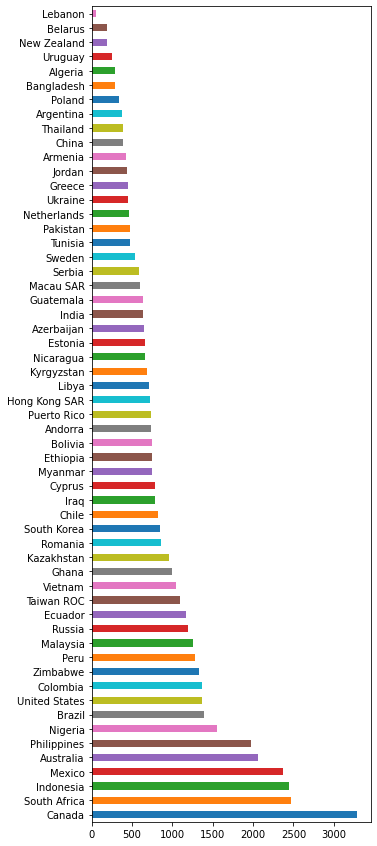

In [18]:
# Convert country code (S003) to country name, and drop S003

df['country'] = None
df.loc[df['S003']==8,'country'] ="Albania"
df.loc[df['S003']==12,'country'] ="Algeria"
df.loc[df['S003']==20,'country'] ="Andorra"
df.loc[df['S003']==31,'country'] ="Azerbaijan"
df.loc[df['S003']==32,'country'] ="Argentina"
df.loc[df['S003']==36,'country'] ="Australia"
df.loc[df['S003']==50,'country'] ="Bangladesh"
df.loc[df['S003']==51,'country'] ="Armenia"
df.loc[df['S003']==68,'country'] ="Bolivia"
df.loc[df['S003']==70,'country'] ="Bosnia Herzegovina"
df.loc[df['S003']==76,'country'] ="Brazil"
df.loc[df['S003']==100,'country'] ="Bulgaria"
df.loc[df['S003']==104,'country'] ="Myanmar"
df.loc[df['S003']==112,'country'] ="Belarus"
df.loc[df['S003']==124,'country'] ="Canada"
df.loc[df['S003']==152,'country'] ="Chile"
df.loc[df['S003']==156,'country'] ="China"
df.loc[df['S003']==158,'country'] ="Taiwan ROC"
df.loc[df['S003']==170,'country'] ="Colombia"
df.loc[df['S003']==191,'country'] ="Croatia"
df.loc[df['S003']==196,'country'] ="Cyprus"
df.loc[df['S003']==203,'country'] ="Czech Rep."
df.loc[df['S003']==214,'country'] ="Dominican Rep."
df.loc[df['S003']==218,'country'] ="Ecuador"
df.loc[df['S003']==222,'country'] ="El Salvador"
df.loc[df['S003']==231,'country'] ="Ethiopia"
df.loc[df['S003']==233,'country'] ="Estonia"
df.loc[df['S003']==246,'country'] ="Finland"
df.loc[df['S003']==250,'country'] ="France"
df.loc[df['S003']==268,'country'] ="Georgia"
df.loc[df['S003']==275,'country'] ="Palestine"
df.loc[df['S003']==276,'country'] ="Germany"
df.loc[df['S003']==288,'country'] ="Ghana"
df.loc[df['S003']==300,'country'] ="Greece"
df.loc[df['S003']==320,'country'] ="Guatemala"
df.loc[df['S003']==332,'country'] ="Haiti"
df.loc[df['S003']==344,'country'] ="Hong Kong SAR"
df.loc[df['S003']==348,'country'] ="Hungary"
df.loc[df['S003']==356,'country'] ="India"
df.loc[df['S003']==360,'country'] ="Indonesia"
df.loc[df['S003']==364,'country'] ="Iran"
df.loc[df['S003']==368,'country'] ="Iraq"
df.loc[df['S003']==376,'country'] ="Israel"
df.loc[df['S003']==380,'country'] ="Italy"
df.loc[df['S003']==392,'country'] ="Japan"
df.loc[df['S003']==398,'country'] ="Kazakhstan"
df.loc[df['S003']==400,'country'] ="Jordan"
df.loc[df['S003']==410,'country'] ="South Korea"
df.loc[df['S003']==414,'country'] ="Kuwait"
df.loc[df['S003']==417,'country'] ="Kyrgyzstan"
df.loc[df['S003']==422,'country'] ="Lebanon"
df.loc[df['S003']==428,'country'] ="Latvia"
df.loc[df['S003']==434,'country'] ="Libya"
df.loc[df['S003']==440,'country'] ="Lithuania"
df.loc[df['S003']==446,'country'] ="Macau SAR"
df.loc[df['S003']==458,'country'] ="Malaysia"
df.loc[df['S003']==466,'country'] ="Mali"
df.loc[df['S003']==484,'country'] ="Mexico"
df.loc[df['S003']==498,'country'] ="Moldova"
df.loc[df['S003']==499,'country'] ="Montenegro"
df.loc[df['S003']==504,'country'] ="Morocco"
df.loc[df['S003']==528,'country'] ="Netherlands"
df.loc[df['S003']==554,'country'] ="New Zealand"
df.loc[df['S003']==558,'country'] ="Nicaragua"
df.loc[df['S003']==566,'country'] ="Nigeria"
df.loc[df['S003']==578,'country'] ="Norway"
df.loc[df['S003']==586,'country'] ="Pakistan"
df.loc[df['S003']==604,'country'] ="Peru"
df.loc[df['S003']==608,'country'] ="Philippines"
df.loc[df['S003']==616,'country'] ="Poland"
df.loc[df['S003']==630,'country'] ="Puerto Rico"
df.loc[df['S003']==634,'country'] ="Qatar"
df.loc[df['S003']==642,'country'] ="Romania"
df.loc[df['S003']==643,'country'] ="Russia"
df.loc[df['S003']==646,'country'] ="Rwanda"
df.loc[df['S003']==682,'country'] ="Saudi Arabia"
df.loc[df['S003']==688,'country'] ="Serbia"
df.loc[df['S003']==702,'country'] ="Singapore"
df.loc[df['S003']==703,'country'] ="Slovakia"
df.loc[df['S003']==704,'country'] ="Vietnam"
df.loc[df['S003']==705,'country'] ="Slovenia"
df.loc[df['S003']==710,'country'] ="South Africa"
df.loc[df['S003']==716,'country'] ="Zimbabwe"
df.loc[df['S003']==724,'country'] ="Spain"
df.loc[df['S003']==752,'country'] ="Sweden"
df.loc[df['S003']==756,'country'] ="Switzerland"
df.loc[df['S003']==762,'country'] ="Tajikistan"
df.loc[df['S003']==764,'country'] ="Thailand"
df.loc[df['S003']==780,'country'] ="Trinidad and Tobago"
df.loc[df['S003']==788,'country'] ="Tunisia"
df.loc[df['S003']==792,'country'] ="Turkey"
df.loc[df['S003']==800,'country'] ="Uganda"
df.loc[df['S003']==804,'country'] ="Ukraine"
df.loc[df['S003']==807,'country'] ="North Macedonia"
df.loc[df['S003']==818,'country'] ="Egypt"
df.loc[df['S003']==826,'country'] ="United Kingdom"
df.loc[df['S003']==834,'country'] ="Tanzania"
df.loc[df['S003']==840,'country'] ="United States"
df.loc[df['S003']==854,'country'] ="Burkina Faso"
df.loc[df['S003']==858,'country'] ="Uruguay"
df.loc[df['S003']==860,'country'] ="Uzbekistan"
df.loc[df['S003']==862,'country'] ="Venezuela"
df.loc[df['S003']==887,'country'] ="Yemen"
df.loc[df['S003']==894,'country'] ="Zambia"
df = df.drop(['S003'], axis=1)
df['country'].value_counts().plot(kind='barh', color=colors, figsize=(5,15))

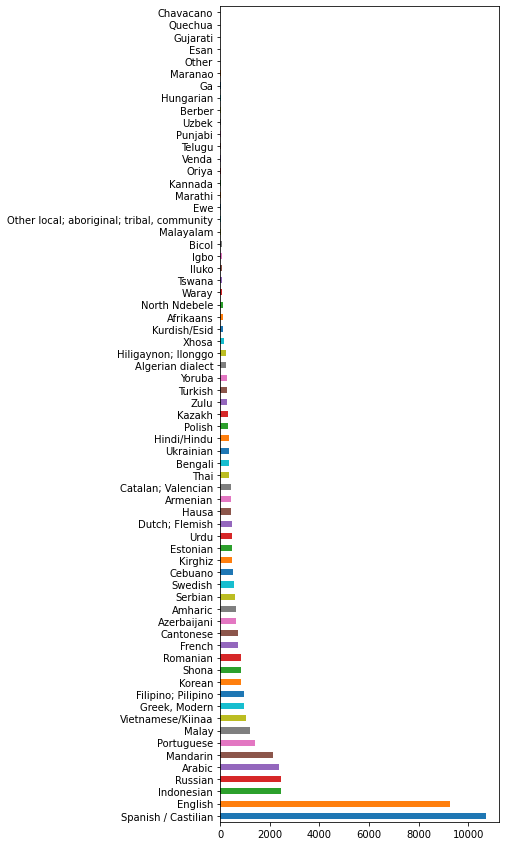

In [19]:
# Convert language code (S016B) to language name, and drop S016B and G016 (Language at home)

df['language']=None
df.loc[df['S016B']==40,'language'] ="Afrikaans"
df.loc[df['S016B']==100,'language'] ="Albanian"
df.loc[df['S016B']==110,'language'] ="Algerian dialect"
df.loc[df['S016B']==130,'language'] ="Amazigh"
df.loc[df['S016B']==140,'language'] ="Amharic"
df.loc[df['S016B']==170,'language'] ="Arabic"
df.loc[df['S016B']==200,'language'] ="Armenian"
df.loc[df['S016B']==220,'language'] ="Assamese"
df.loc[df['S016B']==240,'language'] ="Ateso"
df.loc[df['S016B']==290,'language'] ="Aymara"
df.loc[df['S016B']==310,'language'] ="Azerbaijani"
df.loc[df['S016B']==370,'language'] ="Baluchi"
df.loc[df['S016B']==380,'language'] ="Bamanakan"
df.loc[df['S016B']==390,'language'] ="Bambara"
df.loc[df['S016B']==420,'language'] ="Barahvi"
df.loc[df['S016B']==440,'language'] ="Basque"
df.loc[df['S016B']==480,'language'] ="Bemba"
df.loc[df['S016B']==490,'language'] ="Bengali"
df.loc[df['S016B']==500,'language'] ="Berber"
df.loc[df['S016B']==550,'language'] ="Bicol"
df.loc[df['S016B']==670,'language'] ="Bosnian"
df.loc[df['S016B']==680,'language'] ="Brahui"
df.loc[df['S016B']==720,'language'] ="Bulgarian"
df.loc[df['S016B']==790,'language'] ="Cantonese"
df.loc[df['S016B']==810,'language'] ="Catalan; Valencian"
df.loc[df['S016B']==820,'language'] ="Cebuano"
df.loc[df['S016B']==850,'language'] ="Chavacano"
df.loc[df['S016B']==920,'language'] ="Chinese"
df.loc[df['S016B']==930,'language'] ="Chinese dialects"
df.loc[df['S016B']==1020,'language'] ="Creoles and Pidgins"
df.loc[df['S016B']==1030,'language'] ="Croatian"
df.loc[df['S016B']==1080,'language'] ="Dagbani"
df.loc[df['S016B']==1140,'language'] ="Dioula"
df.loc[df['S016B']==1160,'language'] ="Dogon"
df.loc[df['S016B']==1190,'language'] ="Dutch; Flemish"
df.loc[df['S016B']==1240,'language'] ="English"
df.loc[df['S016B']==1260,'language'] ="Esan"
df.loc[df['S016B']==1270,'language'] ="Spanish / Castilian"
df.loc[df['S016B']==1290,'language'] ="Estonian"
df.loc[df['S016B']==1300,'language'] ="Ewe"
df.loc[df['S016B']==1360,'language'] ="Filipino; Pilipino"
df.loc[df['S016B']==1380,'language'] ="Foulfoulde"
df.loc[df['S016B']==1400,'language'] ="French"
df.loc[df['S016B']==1430,'language'] ="Ga"
df.loc[df['S016B']==1460,'language'] ="Gallegan"
df.loc[df['S016B']==1520,'language'] ="Georgian"
df.loc[df['S016B']==1530,'language'] ="German"
df.loc[df['S016B']==1540,'language'] ="Gilaki"
df.loc[df['S016B']==1580,'language'] ="Greek, Modern"
df.loc[df['S016B']==1610,'language'] ="Gujarati"
df.loc[df['S016B']==1670,'language'] ="Hakka"
df.loc[df['S016B']==1700,'language'] ="Hausa"
df.loc[df['S016B']==1730,'language'] ="Hiligaynon; Ilonggo"
df.loc[df['S016B']==1740,'language'] ="Hindi/Hindu"
df.loc[df['S016B']==1770,'language'] ="Hungarian"
df.loc[df['S016B']==1850,'language'] ="Igbo"
df.loc[df['S016B']==1880,'language'] ="Iluko"
df.loc[df['S016B']==1890,'language'] ="Indonesian"
df.loc[df['S016B']==1990,'language'] ="Italian"
df.loc[df['S016B']==2020,'language'] ="Japanese"
df.loc[df['S016B']==2040,'language'] ="Jewish"
df.loc[df['S016B']==2140,'language'] ="Kannada"
df.loc[df['S016B']==2160,'language'] ="Kaonde"
df.loc[df['S016B']==2230,'language'] ="Kazakh"
df.loc[df['S016B']==2300,'language'] ="Kinyarwanda; Rwandese"
df.loc[df['S016B']==2310,'language'] ="Kirghiz"
df.loc[df['S016B']==2390,'language'] ="Korean"
df.loc[df['S016B']==2420,'language'] ="Kurdish/Esid"
df.loc[df['S016B']==2490,'language'] ="Lanna"
df.loc[df['S016B']==2620,'language'] ="Lozi"
df.loc[df['S016B']==2640,'language'] ="Luganda"
df.loc[df['S016B']==2650,'language'] ="Lumasaba"
df.loc[df['S016B']==2670,'language'] ="Luri/Lori"
df.loc[df['S016B']==2680,'language'] ="Lusania"
df.loc[df['S016B']==2690,'language'] ="Lusoga"
df.loc[df['S016B']==2720,'language'] ="Lwo"
df.loc[df['S016B']==2730,'language'] ="Macedonian"
df.loc[df['S016B']==2810,'language'] ="Malay"
df.loc[df['S016B']==2820,'language'] ="Malayalam"
df.loc[df['S016B']==2830,'language'] ="Malinke"
df.loc[df['S016B']==2870,'language'] ="Mandarin"
df.loc[df['S016B']==2880,'language'] ="Mandarin and Hakka"
df.loc[df['S016B']==2890,'language'] ="Mandarin and Taiwanese"
df.loc[df['S016B']==2930,'language'] ="Maranao"
df.loc[df['S016B']==2940,'language'] ="Marathi"
df.loc[df['S016B']==3040,'language'] ="Montenegrin"
df.loc[df['S016B']==3070,'language'] ="More"
df.loc[df['S016B']==3160,'language'] ="Ndebele"
df.loc[df['S016B']==3200,'language'] ="North Ndebele"
df.loc[df['S016B']==3230,'language'] ="Northern Sotho, Pedi; Sepedi"
df.loc[df['S016B']==3240,'language'] ="Norwegian"
df.loc[df['S016B']==3300,'language'] ="Nyanja"
df.loc[df['S016B']==3380,'language'] ="Oriya"
df.loc[df['S016B']==3460,'language'] ="Panjabi, Punjabi"
df.loc[df['S016B']==3490,'language'] ="Persian;Dari"
df.loc[df['S016B']==3500,'language'] ="Peul"
df.loc[df['S016B']==3510,'language'] ="Pidgin English"
df.loc[df['S016B']==3520,'language'] ="Polish"
df.loc[df['S016B']==3530,'language'] ="Portuguese"
df.loc[df['S016B']==3540,'language'] ="Punjabi"
df.loc[df['S016B']==3550,'language'] ="Pushto"
df.loc[df['S016B']==3570,'language'] ="Quechua"
df.loc[df['S016B']==3580,'language'] ="Romanian"
df.loc[df['S016B']==3600,'language'] ="Romansh"
df.loc[df['S016B']==3630,'language'] ="Russian"
df.loc[df['S016B']==3650,'language'] ="Rutoro"
df.loc[df['S016B']==3720,'language'] ="Saraiki"
df.loc[df['S016B']==3770,'language'] ="Senoufo"
df.loc[df['S016B']==3780,'language'] ="Serbian"
df.loc[df['S016B']==3790,'language'] ="Serbo-Croatian"
df.loc[df['S016B']==3830,'language'] ="Shona"
df.loc[df['S016B']==3860,'language'] ="Sindhi"
df.loc[df['S016B']==3930,'language'] ="Soninke"
df.loc[df['S016B']==3940,'language'] ="Sonrhai"
df.loc[df['S016B']==3950,'language'] ="Sotho, Southern, Ssesotho"
df.loc[df['S016B']==3990,'language'] ="Southern Sotho"
df.loc[df['S016B']==4100,'language'] ="Swazi"
df.loc[df['S016B']==4110,'language'] ="Swedish"
df.loc[df['S016B']==4130,'language'] ="Tagalog"
df.loc[df['S016B']==4150,'language'] ="Taiwanese/Minnanese"
df.loc[df['S016B']==4190,'language'] ="Tamil"
df.loc[df['S016B']==4220,'language'] ="Telugu"
df.loc[df['S016B']==4230,'language'] ="Thai"
df.loc[df['S016B']==4300,'language'] ="Tonga (Tonga Islands)"
df.loc[df['S016B']==4330,'language'] ="Tsonga/Shangaan"
df.loc[df['S016B']==4340,'language'] ="Tswana"
df.loc[df['S016B']==4370,'language'] ="Turkish"
df.loc[df['S016B']==4390,'language'] ="Twi (Akan)"
df.loc[df['S016B']==4410,'language'] ="Ukrainian"
df.loc[df['S016B']==4420,'language'] ="Urdu"
df.loc[df['S016B']==4450,'language'] ="Uzbek"
df.loc[df['S016B']==4460,'language'] ="Venda"
df.loc[df['S016B']==4470,'language'] ="Vietnamese/Kiinaa"
df.loc[df['S016B']==4520,'language'] ="Waray"
df.loc[df['S016B']==4570,'language'] ="Xhosa"
df.loc[df['S016B']==4620,'language'] ="Yoruba"
df.loc[df['S016B']==4660,'language'] ="Zulu"
df.loc[df['S016B']==9000,'language'] ="Other"
df.loc[df['S016B']==9900,'language'] ="Other local; aboriginal; tribal, community"
df = df.drop(['S016B', 'G016'], axis=1)
df['language'].value_counts().plot(kind='barh', color=colors, figsize=(5,15))

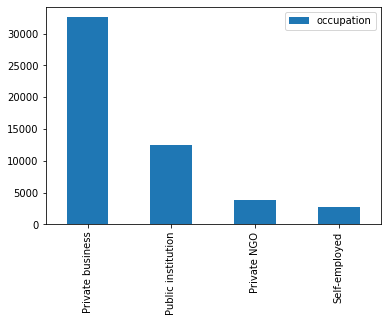

In [20]:
# Change X052 (Occupation code) to occupation, and drop X052

df['occupation'] = None
df.loc[df['X052']==1,'occupation'] ="Public institution"
df.loc[df['X052']==2,'occupation'] ="Private business"
df.loc[df['X052']==3,'occupation'] ="Private NGO"
df.loc[df['X052']==4,'occupation'] ="Self-employed"
df = df.drop(['X052'], axis=1)
pd.DataFrame(df['occupation'].value_counts()).plot(kind='bar', color=colors)

In [21]:
print('The sample has {} features and {} rows of observations.'.format(df.shape[1], df.shape[0]))

The sample has 61 features and 51488 rows of observations.


In [22]:
# data normalization for float, except 'S020' (year), 'country', 'language', and 'occupation'.

cols_except = ['S020', 'country', 'language', 'occupation']
for i in df.columns:
  if i in cols_except:
    continue
  else:
    df[i] = (df[i] - df[i].mean()) / df[i].std()

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S020,"51,488.000","2,015.864",3.305,"2,011.000","2,012.000","2,017.000","2,018.000","2,020.000"
A008,"51,488.000",-0.000,1.000,-1.131,-1.131,0.285,0.285,3.116
A098,"51,488.000",0.000,1.000,-0.831,-0.831,-0.831,1.520,1.520
A099,"51,488.000",-0.000,1.000,-0.570,-0.570,-0.570,0.835,2.239
A100,"51,488.000",-0.000,1.000,-0.494,-0.494,-0.494,-0.494,2.577
A101,"51,488.000",-0.000,1.000,-0.441,-0.441,-0.441,-0.441,3.039
A102,"51,488.000",-0.000,1.000,-0.432,-0.432,-0.432,-0.432,3.211
A103,"51,488.000",0.000,1.000,-0.394,-0.394,-0.394,-0.394,3.342
A104,"51,488.000",0.000,1.000,-0.453,-0.453,-0.453,-0.453,2.794
A105,"51,488.000",0.000,1.000,-0.470,-0.470,-0.470,-0.470,2.702


In [29]:
# Show a list of variable labels and descriptions (questions)

codebook = pd.read_csv("https://www.dropbox.com/s/yygyqp5yhqvmdiy/Description_Variables_simple.csv?dl=1")
summary = pd.DataFrame(df.describe().T, columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']).reset_index()
summary.rename(columns={"index": "variable_code"}, inplace=True)
codebook = codebook.merge(summary, how='inner')
pd.set_option('display.max_colwidth', None)
codebook[['variable_code', 'variable_question']].style.set_properties(**{'text-align': 'left'})

,variable_code,variable_question
0,S020,nan
1,A008,"Taking all things together, would you say you are:"
2,A098,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Church or religious organization"
3,A099,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Sport or recreational organization, football/baseball/rugby team"
4,A100,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Art, music or educational organization"
5,A101,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Labour Union"
6,A102,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Political party"
7,A103,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Environmental organization"
8,A104,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Professional association"
9,A105,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Humanitarian or charitable organization"


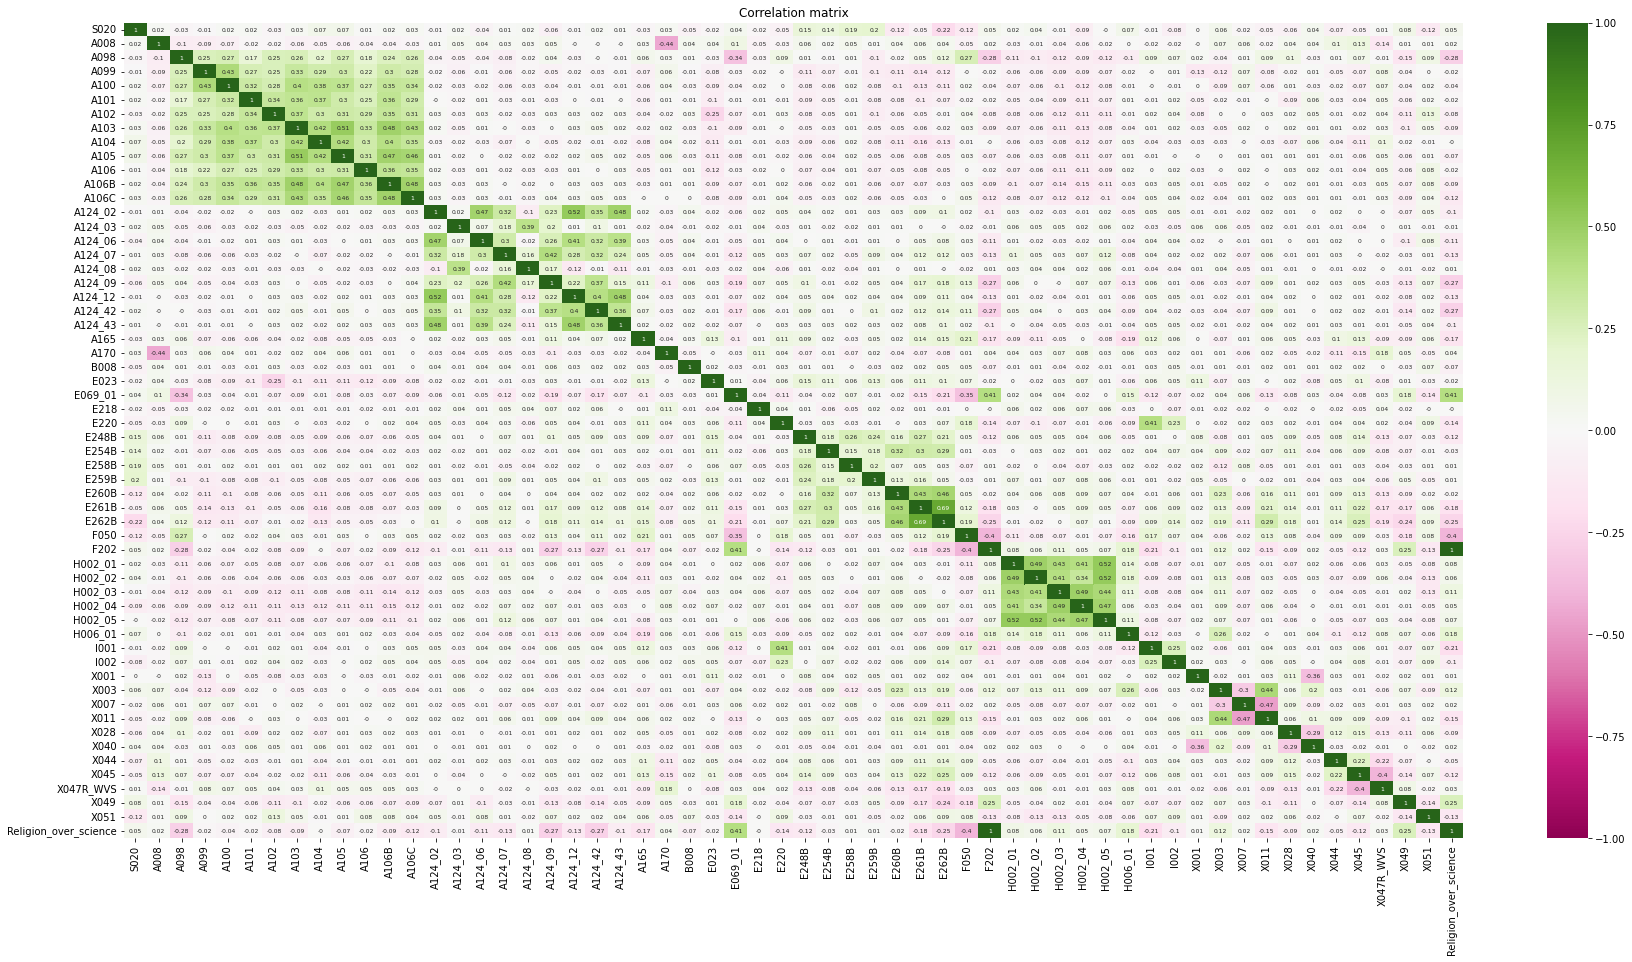

In [34]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(df.corr().round(2), cmap="PiYG", vmax=1, vmin=-1, annot=True, annot_kws={"size":6})
plt.title('Correlation matrix')
plt.show()
plt.close()

In [26]:
from google.colab import files
df.to_csv('data.csv') 
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# OLS of outcome, predicted by dummies of year, country, language, and occupation.

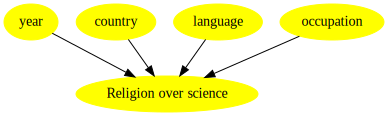

In [27]:
# Conceptual model
import graphviz

g = graphviz.Digraph()

# Yellow for main relationship to be estimated
g.attr('node', style='filled', color='yellow', shape='oval')
for i in ['year', 'country', 'language', 'occupation']:
    g.node(i)
    g.edge(i, 'Religion over science')

g

In [28]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='Religion_over_science ~ 1 + C(S020) + C(country) + C(language) + C(occupation)', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Religion_over_science   R-squared:                       0.381
Model:                               OLS   Adj. R-squared:                  0.379
Method:                    Least Squares   F-statistic:                     258.8
Date:                   Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                           18:46:28   Log-Likelihood:                -58414.
No. Observations:                  49771   AIC:                         1.171e+05
Df Residuals:                      49652   BIC:                         1.181e+05
Df Model:                            118                                         
Covariance Type:               nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -0.5733      0.563     -1.018      0.309      -1.677       0.530
C(S020)[T.2012]                                              -0.1196      0.038     -3.159      0.002      -0.194      -0.045
C(S020)[T.2013]                                               0.0442      0.056      0.783      0.434      -0.066       0.155
C(S020)[T.2014]                                              -0.1192      0.057     -2.088      0.037      -0.231      -0.007
C(S020)[T.2017]                                              -0.1472      0.046     -3.198      0.001      -0.237      -0.057
C(S020)[T.2018]                                              -0.0914      0.038     -2.373      0.018      -0.167      -0.016
C(S020)[T.2019]                                              -0.0798      0.041     -1.969      0.049      -0.159      -0.000
C(S020)[T.2020]                                              -0.2284      0.041     -5.565      0.000      -0.309      -0.148
C(country)[T.Andorra]                                         1.3910      0.572      2.433      0.015       0.270       2.512
C(country)[T.Argentina]                                       1.0279      0.575      1.787      0.074      -0.100       2.155
C(country)[T.Armenia]                                         0.3763      0.282      1.334      0.182      -0.177       0.929
C(country)[T.Australia]                                       1.2417      0.557      2.230      0.026       0.150       2.333
C(country)[T.Azerbaijan]                                      0.4384      0.282      1.556      0.120      -0.114       0.991
C(country)[T.Bangladesh]                                     -1.0779      0.469     -2.297      0.022      -1.998      -0.158
C(country)[T.Belarus]                                         0.2275      0.833      0.273      0.785      -1.405       1.860
C(country)[T.Bolivia]                                         0.5070      0.575      0.882      0.378      -0.619       1.633
C(country)[T.Brazil]                                          0.3751      0.280      1.338      0.181      -0.174       0.925
C(country)[T.Canada]                                          1.3608      0.558      2.440      0.015       0.268       2.454
C(country)[T.Chile]                                           1.0150      0.571      1.776      0.076      -0.105       2.135
C(country)[T.China]                                           1.8331      0.595      3.081      0.002       0.667       2.999
C(country)[T.Colombia]                                        0.5586      0.571      0.978      0.328      -0.561       1.678
C(country)[T.Cyprus]      